In [1]:
import numpy as np
import matplotlib.pyplot as plt

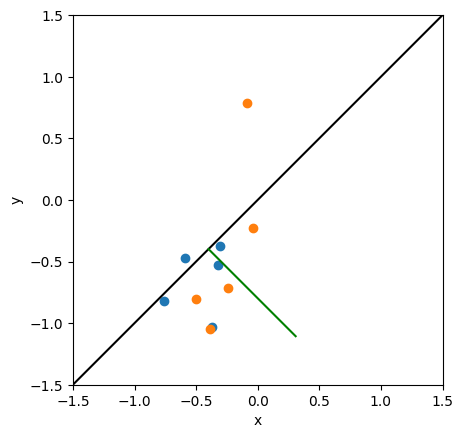

In [21]:
# set up random data for two linearly seperable classes centered around Gaussians
n1 = 5
mu_x1 = -0.5
mu_y1 = -0.5
sig_x1 = 0.2
sig_y1 = 0.3

# random sampling of x 
x1rng = np.random.default_rng(seed=37)
x1 = x1rng.normal(loc=mu_x1,scale=sig_x1,size=n1)

# random sampling of x 
y1rng = np.random.default_rng(seed=4329)
y1 = y1rng.normal(loc=mu_y1,scale=sig_y1,size=n1)

n2 = 5
mu_x2 = -0.2
mu_y2 = -0.5
sig_x2 = 0.2
sig_y2 = 0.4

# random sampling of x 
x2rng = np.random.default_rng(seed=557)
x2 = x2rng.normal(loc=mu_x2,scale=sig_x2,size=n2)

# random sampling of x 
y2rng = np.random.default_rng(seed=949)
y2 = y2rng.normal(loc=mu_y2,scale=sig_y2,size=n2)


# also define initial decision surface
w = np.array([0.,1.])
xdec = np.linspace(-1.5, 1.5, 20)
ydec = w[0]+(w[1]*xdec)

# plot corresponding weight vector
xweight1 = x1.min() + ((x2.max() - x1.min()) / 2.)
yweight1 = w[0]+(w[1]*xweight1)
xweight2 = xweight1 - (-w[1]/np.sqrt(1+(w[1]**2)))
yweight2 = yweight1 - (1/np.sqrt(1+(w[1]**2)))
xweight = np.array([xweight1,xweight2])
yweight = np.array([yweight1,yweight2])

# make plots
plt.scatter(x1,y1)
plt.scatter(x2,y2)
plt.plot(xdec,ydec, color="black")
plt.plot(xweight,yweight, color="green")
plt.xlabel("x")
plt.ylabel("y")
plt.gca().set_aspect('equal')
plt.gca().set_xlim(left = -1.5 , right = 1.5)
plt.gca().set_ylim(bottom = -1.5 , top = 1.5)
plt.show()

	 Updated weights
[-1.         -2.29495789]


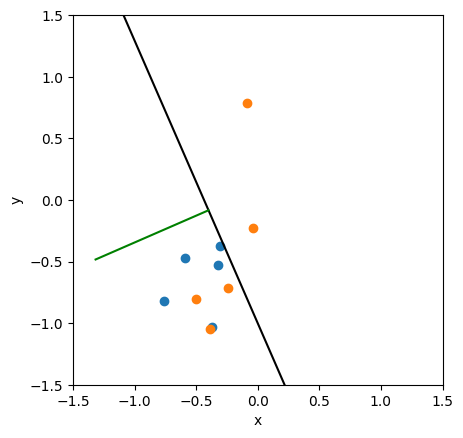

In [48]:
# perceptron algorithm should converge if classes are linearly seperable
# first check for misclassified blue points and update weights
i=0
while i<n1:
    if w[0] + (w[1]*x1[i]) < y1[i]:
        w[0] += 1
        w[1] += x1[i]
        break
    i += 1

# now check for misclassified orange points and update weights
j=0
if i == n1:
    while j<n2:
        if w[0] + (w[1]*x2[j]) >= y2[j]:
            w[0] -= 1
            w[1] -= x2[j]
            break
        j += 1

print("\t Updated weights")
print(w)

# update decision surface
ydec = w[0]+(w[1]*xdec)

# plot corresponding weight vector
xweight1 = x1.min() + ((x2.max() - x1.min()) / 2.)
yweight1 = w[0]+(w[1]*xweight1)
xweight2 = xweight1 - (-w[1]/np.sqrt(1+(w[1]**2)))
yweight2 = yweight1 - (1/np.sqrt(1+(w[1]**2)))
xweight = np.array([xweight1,xweight2])
yweight = np.array([yweight1,yweight2])

# make plots
plt.scatter(x1,y1)
plt.scatter(x2,y2)
plt.plot(xdec,ydec, color="black")
plt.plot(xweight,yweight, color="green")
plt.xlabel("x")
plt.ylabel("y")
plt.gca().set_aspect('equal')
plt.gca().set_xlim(left = -1.5 , right = 1.5)
plt.gca().set_ylim(bottom = -1.5 , top = 1.5)
plt.show()

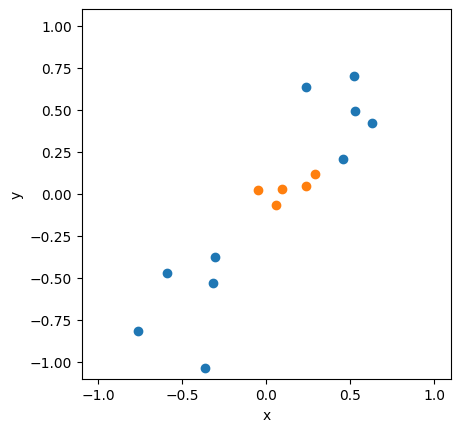

In [18]:
# set up random data for two classes
# first class is centered around two gaussians in opposite quadrants
n1 = 5
mu_x1 = -0.5
mu_y1 = -0.5
sig_x1 = 0.2
sig_y1 = 0.3

# random sampling of x 
x1rng = np.random.default_rng(seed=37)
x1 = x1rng.normal(loc=mu_x1,scale=sig_x1,size=n1)

# random sampling of x 
y1rng = np.random.default_rng(seed=4329)
y1 = y1rng.normal(loc=mu_y1,scale=sig_y1,size=n1)

n2 = 5
mu_x2 = -mu_x1
mu_y2 = -mu_y1
sig_x2 = 0.2
sig_y2 = 0.2

# random sampling of x 
x2rng = np.random.default_rng(seed=5347)
x2 = x2rng.normal(loc=mu_x2,scale=sig_x2,size=n2)

# random sampling of x 
y2rng = np.random.default_rng(seed=1249)
y2 = y2rng.normal(loc=mu_y2,scale=sig_y2,size=n2)

# merge with data from first Gaussian
x1 = np.concatenate((x1,x2))
y1 = np.concatenate((y1,y2))

# second class is centered around gaussian at the origin
n2 = 5
mu_x2 = 0.0
mu_y2 = 0.0
sig_x2 = 0.1
sig_y2 = 0.1

# random sampling of x 
x2rng = np.random.default_rng(seed=534)
x2 = x2rng.normal(loc=mu_x2,scale=sig_x2,size=n2)

# random sampling of x 
y2rng = np.random.default_rng(seed=9119)
y2 = y2rng.normal(loc=mu_y2,scale=sig_y2,size=n2)

# make plots
plt.scatter(x1,y1)
plt.scatter(x2,y2)
plt.xlabel("x")
plt.ylabel("y")
plt.gca().set_aspect('equal')
plt.gca().set_xlim(left = -1.1 , right = 1.1)
plt.gca().set_ylim(bottom = -1.1 , top = 1.1)
plt.show()

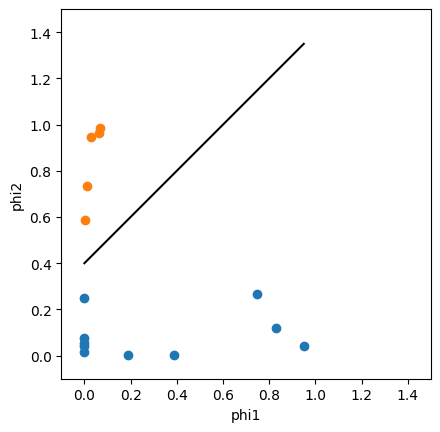

In [19]:
# use Gaussian basis functions to get linearly seperable data in feature space
sig_phi1 = 0.3
mu_phi_x1 = mu_x1
mu_phi_y1 = mu_y1

sig_phi2 = 0.3
mu_phi_x2 = mu_x2
mu_phi_y2 = mu_y2

def gauss(x0,y0,mux,muy,sig):
    return np.exp(-(((x0-mux)**2)+((y0-muy)**2))/(2*(sig**2)))

phi1_c1 = np.zeros(x1.size)
phi2_c1 = np.zeros(x1.size)
phi1_c2 = np.zeros(x2.size)
phi2_c2 = np.zeros(x2.size)

for i in range(x1.size):
    phi1_c1[i] = gauss(x1[i],y1[i],mu_phi_x1,mu_phi_y1,sig_phi1)
    phi2_c1[i] = gauss(x1[i],y1[i],mu_phi_x2,mu_phi_y2,sig_phi2)

for i in range(x2.size):
    phi1_c2[i] = gauss(x2[i],y2[i],mu_phi_x1,mu_phi_y1,sig_phi1)
    phi2_c2[i] = gauss(x2[i],y2[i],mu_phi_x2,mu_phi_y2,sig_phi2)

# also define decision surface
w = np.array([0.4,1.])
phi1dec = np.linspace(phi1_c1.min(), phi1_c1.max(), 20)
phi2dec = w[0]+(w[1]*phi1dec)

# make plots
plt.scatter(phi1_c1,phi2_c1)
plt.scatter(phi1_c2,phi2_c2)
plt.plot(phi1dec,phi2dec, color="black")
plt.xlabel("phi1")
plt.ylabel("phi2")
plt.gca().set_aspect('equal')
plt.gca().set_xlim(left = -0.1, right = 1.5)
plt.gca().set_ylim(bottom = -0.1 , top = 1.5)
plt.show()

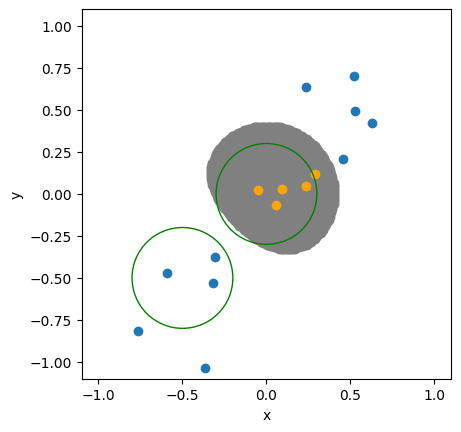

In [20]:
# now map decision surface back into original coordinate space
xgrid =  np.linspace(x1.min(), x1.max(), 200)
ygrid =  np.linspace(y1.min(), y1.max(), 200)

class2x = []
class2y = []
for i in range(xgrid.size):
    for j in range(ygrid.size):
        phi1 = gauss(xgrid[i],ygrid[j],mu_phi_x1,mu_phi_y1,sig_phi1)
        phi2 = gauss(xgrid[i],ygrid[j],mu_phi_x2,mu_phi_y2,sig_phi2)
        if w[0]+(w[1]*phi1) < phi2:
            class2x.append(xgrid[i])
            class2y.append(ygrid[j])

class2xarr = np.array(class2x)
class2yarr = np.array(class2y)

# make plots
plt.scatter(x1,y1)
plt.scatter(class2xarr,class2yarr, c="grey")
plt.scatter(x2,y2, c="orange")
# include circles for basis funcrtions in coordinate space
phi1xy = plt.Circle( (mu_phi_x1,mu_phi_y1), sig_phi1 , fill = False, color="green" )
plt.gca().add_artist(phi1xy)
phi2xy = plt.Circle( (mu_phi_x2,mu_phi_y2), sig_phi2 , fill = False, color="green" )
plt.gca().add_artist(phi2xy)
plt.xlabel("x")
plt.ylabel("y")
plt.gca().set_aspect('equal')
plt.gca().set_xlim(left = -1.1 , right = 1.1)
plt.gca().set_ylim(bottom = -1.1 , top = 1.1)
plt.show()